<a href="https://colab.research.google.com/github/ElishevaMedioni/emotion_detection_AI_project/blob/master/detectEmotion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detect Emotion Project
## AI Course - Rivka Gadot
##Elisheva Medioni


**The Libraries** 📚



*   TensorFlow

  developed by Google, TensorFlow is a library that we can use for quickly creating neural networks and modeling them and running them on some sample data to see what the output is going to be.


*   Keras

  Keras is an API, a set of functions that we can use in order to manipulate neural networks inside of TensorFlow.

*   Numpy

  NumPy is a library adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

*   Matplotlib

  Matplotlib is a plotting library that provides an object-oriented API for embedding plots.







In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

###Displaying Images 🖼

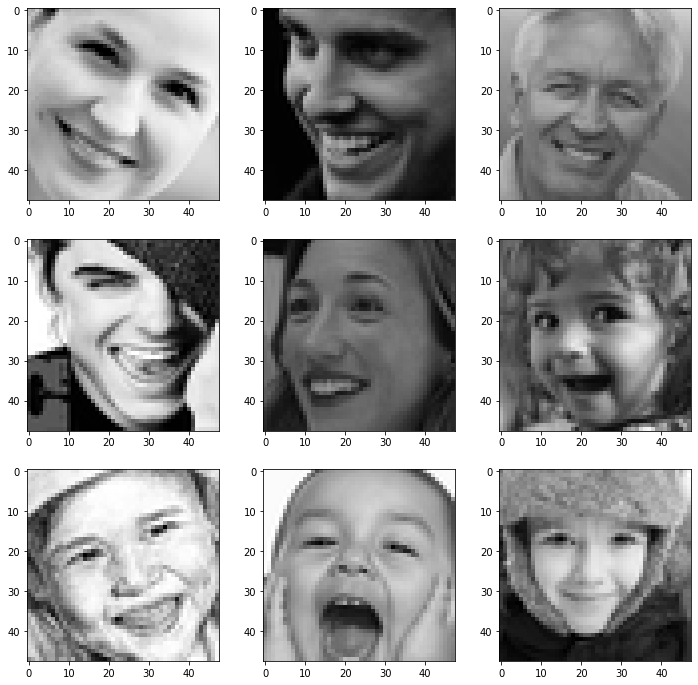

In [ ]:
picture_size = 48
expression = 'Happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/drive/MyDrive/emotion_detection_project/train"+expression+"/"+
                  os.listdir("/content/drive/MyDrive/emotion_detection_project/train" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


**Data Augmentation** is a method of artificially creating a new dataset for 
training from the existing training dataset to improve the performance of deep learning neural networks with the amount of data available. 

Here I used a Keras `ImageDataGenerator` object to apply data augmentation. Each new batch of our data is randomly adjusting according to the parameters supplied to `ImageDataGenerator`

I used the `flow_from_directory` method, which is a generator, which takes in the path to the parent directory containing different classes of image data and generates batches of images to be fed to the ImageDataGenerator.

`datagen_train.flow_from_directory` is the function that is used to prepare data from the train directory. 
Target_size specifies the target size of the image.

`datagen_val.flow_from_directory` is used to prepare test data for the model and all is similar as above.


---


My data set is huge so I save it in my Drive to make it easier and more efficient to work with Google Colab.

The train set size: 31542 images

The validation set size: 7577 images 

Then I have a ratio of about 90/10%


In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory("/content/drive/MyDrive/emotion_detection_project/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory("/content/drive/MyDrive/emotion_detection_project/test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 31542 images belonging to 7 classes.
Found 7577 images belonging to 7 classes.


**Creating the Model:** 🏗

`Sequential` model - a sequential neural network - meaning one layer after another. Sequential is the easiest way to build a model in Keras.
The model type that we will be using is Sequential.  It allows you to build a model layer by layer.

We build a sequential model with 4 Convolutional layers & 2 Fully Connected layers.


We use the `add()` function to add layers to our model.

Our first 2 layers are `Conv2D` layers. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices.

64 in the first layer is the number of nodes in the layer.

`Batch normalization()` is used to normalize the output of the previous layers. The activations scale the input layer in normalization.
 
`Activation()` is the activation function for the layer. The activation function I will be using for our first 2 layers is the ReLU= Rectified Linear Activation. This activation function has been proven to work well in neural networks.

`MaxPooling2D` takes the maximum value from a 2D array.

pool_size: integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window.

`Dropout` - Dropout is a technique used to prevent a model from overfitting.

rate: Float between 0 and 1. Fraction of the input units to drop.

`Flatten()` layer serves as a connection between the convolution and dense layers.

`Dense` - a layer that each of the nodes inside of the layer is going to be connected to each from the previous layer, so we have a densely connected layer.

This layer is going to have 7 units inside of it = our 7 classes.

The activation is `‘softmax’`. 

Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

<br> 

---



**Compiling the model** 🔄

Compiling the model takes three parameters: optimizer, loss and metrics.

`optimizer` - TensorFlow gives you a choice of how you would like to optimize the weights. The optimizer controls the learning rate. 

Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.

`loss` - We will use ‘categorical_crossentropy’ for our loss function. This is the most common choice for classification.

`metrics` - how I want to evaluate my model, ‘accuracy’ is a common way to be able to evaluate model performance

`model.summary()` is called to print a useful summary of the model


In [ ]:

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Callbacks**

A callback is an object that can perform actions at various stages of training.

<br>

**EarlyStopping**

`EarlyStopping` is stopping the training when validation accuracy starts to decrease.
<br><br>arguments:<br>
`min_delta` is a threshold to whether quantify a loss at some epoch as improvement or not. If the difference of loss is below min_delta, it is quantified as no improvement. Better to leave it as 0 since we're interested in when loss becomes worse. <br>

`patience` argument represents the number of epochs before stopping once your loss starts to increase. <br>

`verbose` decides what to print,  allow to see output (set to 1). <br>

<br>

**ModelCheckpoint**


A good use of checkpointing is to output the model weights each time an improvement is observed during training.
In this case, model weights are written to the file *model.h5* only if the classification accuracy of the model on the validation dataset improves over the best seen so far.

 if `save_best_only=True` , it only saves when the model is considered the "best" 
 <br><br>

**ReduceLROnPlateau**

`ReduceLROnPlateau` - Reduce learning rate when a metric has stopped improving.

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# pack all my callbacks into a single callbacks list so they can all be called together
callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 15

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Fitting the Model with Training and Validation Data** 🏋
<br>

`fit_generator` is used to fit the data into the model made above, other factors used are:

`steps_per_epochs` tells us about the number of times the model will execute for the training data

`callbacks` - a list of callback functions applied during the training of our model

`epochs` - how many times you go through your training set
<br><br>
**Why I used fit_generator instead of fit?**

`fit` is used when the entire training dataset can fit into the memory and no data augmentation is applied.

`fit_generator` is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.


In [ ]:

history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = train_set.n//train_set.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
246/246 [==============================] - ETA: 0s - loss: 1.8366 - accuracy: 0.3063 WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 246 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: val_accuracy improved from -inf to 0.35212, saving model to ./model.h5
246/246 [==============================] - 16567s 67s/step - loss: 1.8366 - accuracy: 0.3063 - val_loss: 1.7404 - val_accuracy: 0.3521 - lr: 0.0010
Epoch 2/15
246/246 [==============================] - 51s 208ms/step - loss: 1.4659 - accuracy: 0.4497 - lr: 0.0010
Epoch 3/15
246/246 [==============================] - 51s 205ms/step - loss: 1.3013 - accuracy: 0.5113 - lr: 0.0010
Epoch 4/15
246/246 [==============================] - 50s 204ms/step - loss: 1.2025 - accuracy: 0.5499 - lr: 0.0010
Epoch 5/15
246/246 [==============================] - 51

###**Plotting Accuracy & Loss** 📈

The **training loss** indicates how well the model is fitting the training data, while the **validation loss** indicates how well the model fits new data.
<br><br>
**Training Accuracy** - How the model is able to classify the two images during training on the training dataset.

**Validation Accuracy** - How the model is able to classify the images with the validation dataset.


In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()